# Variational Autoencoder (VAE) for MNIST Dataset

This Jupyter notebook contains code for a Variational Autoencoder (VAE) model trained on the MNIST dataset. The VAE model is a generative model that learns to encode input data into a lower-dimensional latent space and then decode it back to reconstruct the original input.

## Table of Contents

1. [Imports and Setup](#imports-and-setup)
2. [Data Preparation](#data-preparation)
3. [Model Architecture](#model-architecture)
4. [Training the Model](#training-the-model)
5. [Visualization](#visualization)

## Imports and Setup

The code begins by importing the necessary libraries and modules. It also sets up the environment and defines some constants.

```python
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
```

## Data Preparation

The MNIST dataset is loaded and preprocessed. The images are flattened and normalized to have values between 0 and 1.

```python
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (-1, 28 * 28))
x_test = np.reshape(x_test, (-1, 28 * 28))
```

## Model Architecture

The VAE model consists of an encoder network and a decoder network. The encoder network takes the input data and encodes it into a lower-dimensional latent space. The decoder network takes the latent space representation and decodes it back to reconstruct the original input.

```python
# Encoder network
inputs = Input(shape=(input_dim,), name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Sample z
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder network
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(input_dim, activation='sigmoid')(x)

# Instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')

# Instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')
```

## Training the Model

The VAE model is compiled with the Adam optimizer and a custom loss function that combines the reconstruction loss and the KL divergence loss. The model is then trained on the training set for a specified number of epochs.

```python
# Define VAE loss
reconstruction_loss = binary_crossentropy(inputs, outputs) * input_dim
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))
```

## Visualization

The `plot_latent_space` function is defined to visualize the latent space of the VAE model. It generates a grid of samples from the latent space and decodes them using the decoder network to reconstruct the original input.

```python
def plot_latent_space(encoder, n=30, figsize=15):
    # ...

plot_latent_space(encoder)
```

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 784)]        0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 256)          200960      ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 2)            514         ['dense_5[0][0]']                
                                                                                                  
 z_log_var (Dense)              (None, 2)            514         ['dense_5[0][0]']                
                                                                                            

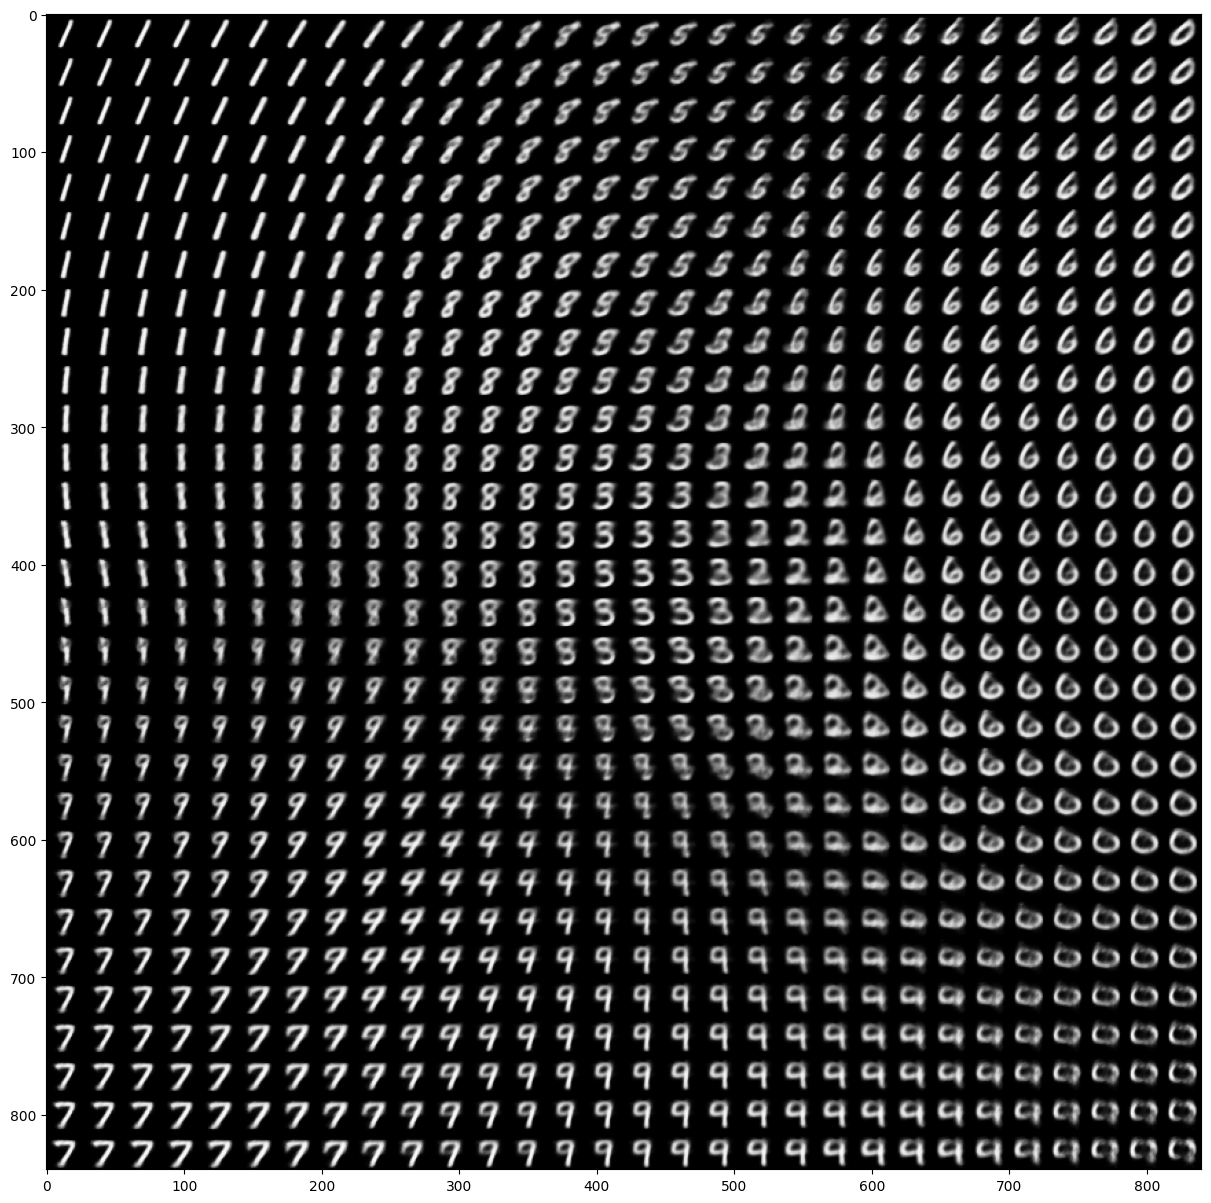

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (-1, 28 * 28))
x_test = np.reshape(x_test, (-1, 28 * 28))

# Define network parameters
input_dim = 784  # 28*28 pixels
latent_dim = 2   # Dimensionality of the latent space
intermediate_dim = 256  # Number of neurons in the hidden layers
batch_size = 128
epochs = 50

# Encoder network
inputs = Input(shape=(input_dim,), name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Sample z
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# Decoder network
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(input_dim, activation='sigmoid')(x)

# Instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# Instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

# Define VAE loss
reconstruction_loss = binary_crossentropy(inputs, outputs) * input_dim
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

# Train the VAE
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Plot the results
def plot_latent_space(encoder, n=30, figsize=15):
    digit_size = 28
    scale = 2.0
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

plot_latent_space(encoder)
